<a href="https://colab.research.google.com/github/jigsawfallingintoplace/KAUST/blob/master/KAUST_Dataset_Data_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

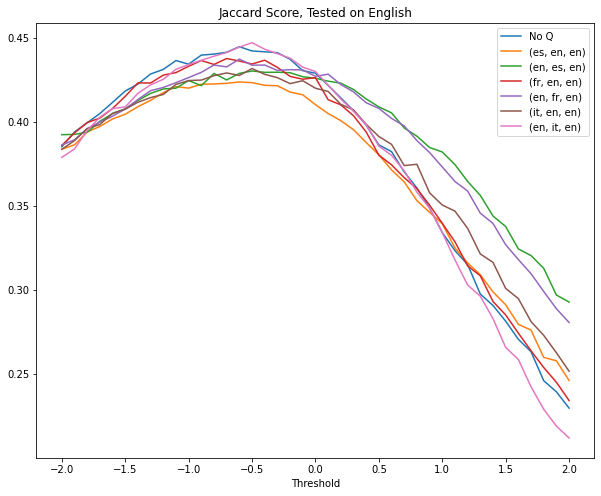

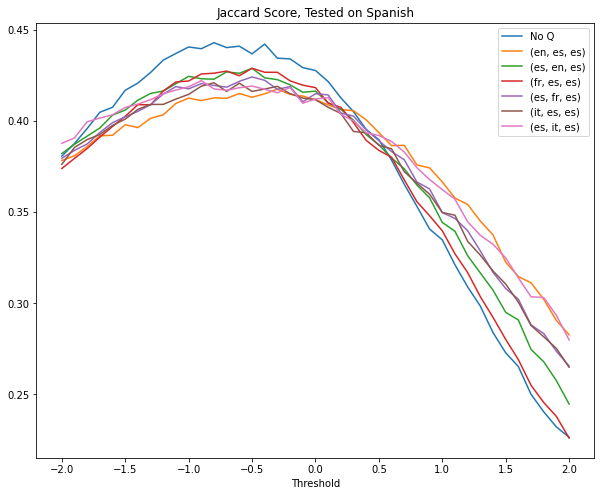

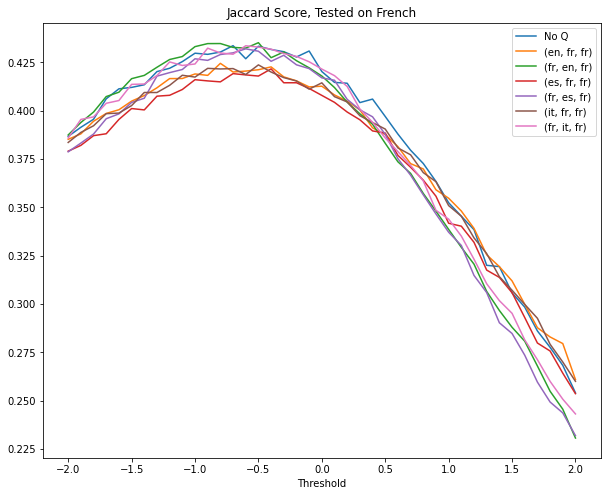

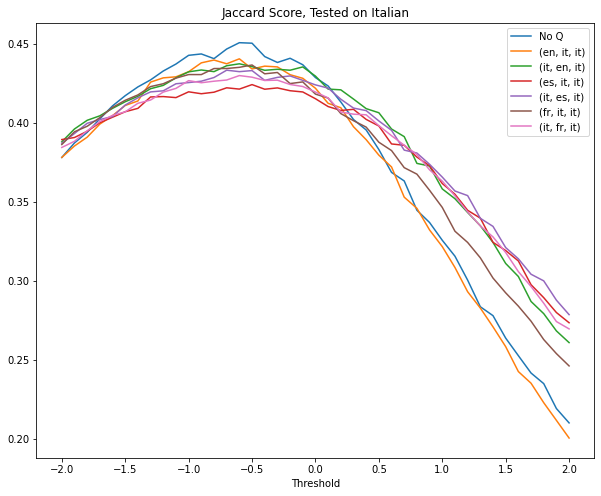

In [ ]:
#@title 默认标题文本
import pandas as pd
import numpy as np

class AutoVivification(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

a = AutoVivification()

lang = ['en', 'es', 'fr', 'it']

for src in lang:
  for tgt in lang:
    if src == tgt:
      continue
    a[src][tgt][src] = pd.read_pickle("/content/0804_" + src + "_src_" + tgt + "_tgt_" + src + "_test.pandas")
    a[src][tgt][tgt] = pd.read_pickle("/content/0804_" + src + "_src_" + tgt + "_tgt_" + tgt + "_test.pandas")

for src in lang:
  a[src][src][src] = pd.read_pickle("/content/0804_" + src + "_src_" + src + "_tgt_" + src + "_test.pandas")
d0 = {"Threshold": a['es']['en']['es']['Threshold']}

df = {}
fullname = {
    "en": "English",
    "fr": "French",
    "it": "Italian",
    "es": "Spanish"
}

criteria = "Jaccard"

for testlang in lang:
  data = d0.copy()
  data["No Q"] = a[testlang][testlang][testlang][criteria]
  for l in lang:
    if l == testlang:
      continue
    s1 = '(' + l + ', ' + testlang + ', ' + testlang + ')'
    data[s1] = a[l][testlang][testlang][criteria]
    s2 = '(' + testlang + ', ' + l + ', ' + testlang + ')'
    data[s2] = a[testlang][l][testlang][criteria]

  df[testlang] = pd.DataFrame(data)
  df[testlang].plot(x="Threshold",title= criteria + " Score, Tested on " + fullname[testlang], figsize=(10, 8))


